Ejercicio 1

En esta página https://www.kite.com/python/examples/250/
numpy-compute-the-singular-value-decomposition-of-a-matrix se
encuentran las instrucciones para calcular la descomposición en valores singulares de
una matriz en python.
- En una libreta de Jupyter, calcula la SVD de la matriz A = [[1, 2], [2, 3]]. Grafica
el efecto sobre el conjunto de los vectores en R
2 de longitud 1 (el círculo de
centro [0, 0] y radio 1) al aplicarle V
T luego Σ y luego U. Compara el efecto de
aplicarle al círculo directamente A.
- Calcula la matriz de rank 1 que mejor aproxime a A

Obtenemos dependencias y el círculo unitario al que le aplicaremos las transformaciones de A.

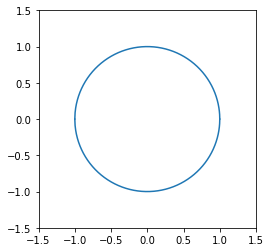

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import matrixToPlot

x = np.linspace(-1, 1, 1000)
y = np.sqrt(-(x**2)+1)
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.gca().set_aspect('equal')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

Obtenemos la descomposición en valores singulares de A.

In [48]:
A = [[1, 2],[2, 3]]
u, s, v = np.linalg.svd(A)

print("u:", u)
print("s:", s)
print("v:", v)
print("A:", A)

u: [[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]
s: [4.23606798 0.23606798]
v: [[-0.52573111 -0.85065081]
 [ 0.85065081 -0.52573111]]
A: [[1, 2], [2, 3]]


Ahora, vamos a utilizar un par de funciones de utilería para graficar como la descomposición afecta al circulo unitario

Aplicando "u"

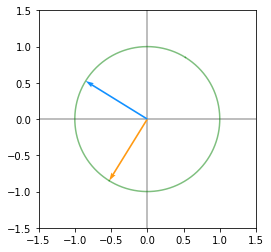

In [49]:
matrixToPlot(np.array(u))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal')
plt.show()

Aplicando "s"

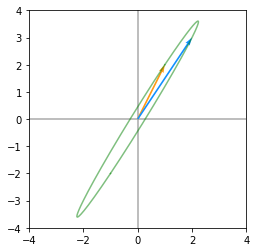

In [50]:
matrixToPlot(u.dot(np.diag(s).dot(v)))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal')
plt.show()

Aplicando "v"

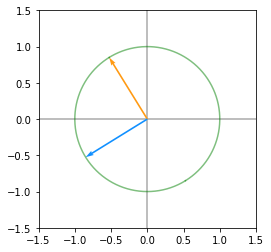

In [51]:
matrixToPlot(np.array(v))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal')
plt.show()

Qué pasa su aplicamos A directamente?

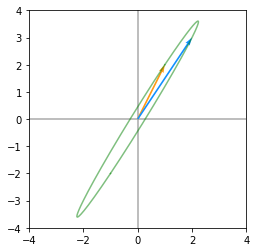

In [52]:
matrixToPlot(np.array(A))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal')
plt.show()

Ahora, encontraremos la matriz de rango-1 más cercana a A.

In [53]:
Ar = np.zeros((len(u), len(v)))
for i in range(1):
    Ar += s[i] * np.outer(u.T[i], v[i])
print(Ar)

[[1.17082039 1.89442719]
 [1.89442719 3.06524758]]


Conclusiones:
u y v constituyen funciones de rotación, mientras que s constituye un efecto de reescalamiento.
Al aplicar todas al mismo tiempo, podemos obtener la transformación del círculo unitario contra la matriz original.

La descomposición en valores singulares pueden ayudarlos a elegir el efecto deseado sobre nuestros datos, podemos obtener
dos tipos de rotaciones distintas y una función de escalamiento de datos, como en este ejemplo.